In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import datetime
zxynb = 1
%matplotlib inline

In [2]:
def rotateImage(img, degree, pt1, pt2, pt3, pt4): 
  print(pt1,pt2,pt3,pt4)
  height, width = img.shape[:2]
  heightNew = int(width * fabs(sin(radians(degree))) +
                  height * fabs(cos(radians(degree))))
  widthNew = int(height * fabs(sin(radians(degree))) +
                 width * fabs(cos(radians(degree))))
  matRotation = cv2.getRotationMatrix2D((width//2, height//2), degree, 1)
#   print(matRotation)
  matRotation[0, 2] += (widthNew - width) / 2
  matRotation[1, 2] += (heightNew - height) / 2
  print(matRotation)
  imgRotation = cv2.warpAffine(
      img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
  pt1 = list(pt1)
  pt3 = list(pt3)
  [[pt1[0]], [pt1[1]]] = np.dot(
      matRotation, np.array([[pt1[0]], [pt1[1]], [1]]))
  [[pt3[0]], [pt3[1]]] = np.dot(
      matRotation, np.array([[pt3[0]], [pt3[1]], [1]]))
  print(pt1,pt3,pt2,pt4)
  xmin = np.max([np.min([pt1[1],pt3[1]]),0])
  xmax = np.min([np.max([pt1[1],pt3[1]]),imgRotation.shape[0]])
  ymin = np.max([np.min([pt1[0],pt3[0]]),0])
  ymax = np.min([np.max([pt1[0],pt3[0]]),imgRotation.shape[1]])
  print(imgRotation.shape)
  print(xmin,xmax,ymin,ymax)
  imgOut = imgRotation[int(xmin):int(xmax), int(ymin):int(ymax)]

  imgOut = cv2.resize(imgOut, (500, 500))
  return imgOut;


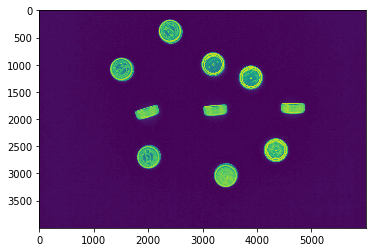

In [3]:
origin = cv2.imread("./resource/DSC02715.JPG")
hsv = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)

# lower_blue = np.array([10,50,50])
# upper_blue = np.array([180,255,255])
# mask = cv2.inRange(hsv,lower_blue,upper_blue)
# img = cv2.resize(mask,(300,300))
h,s,v = cv2.split(hsv)
plt.imshow(s)

In [4]:
# gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
gray = s

In [5]:
# gray = cv2.blur(s,(30,30))
# plt.imshow(s)

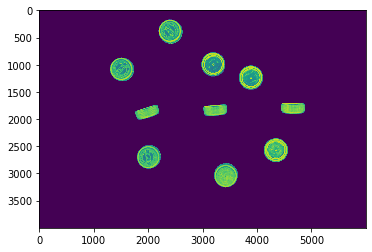

In [6]:
(_, gray) = cv2.threshold(s, 35, 255, cv2.THRESH_TOZERO)
plt.imshow(gray)

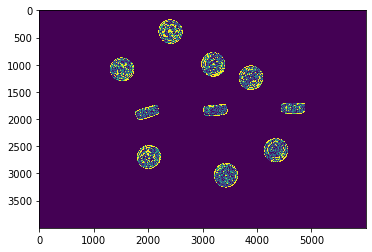

In [7]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.add(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

In [8]:
# blurred = cv2.medianBlur(gradient, 9)
# plt.imshow(blurred)
blurred = gradient

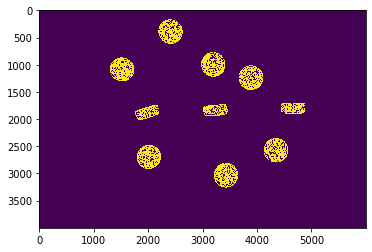

In [9]:
(_, thresh) = cv2.threshold(blurred, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

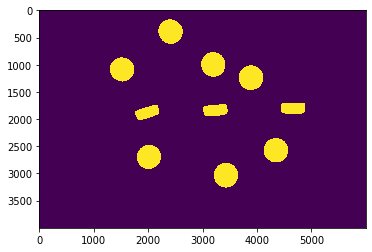

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
#  7,7
cl = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cl)

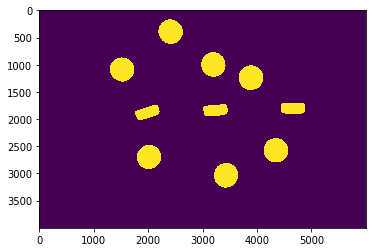

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
closed = cv2.morphologyEx(cl, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

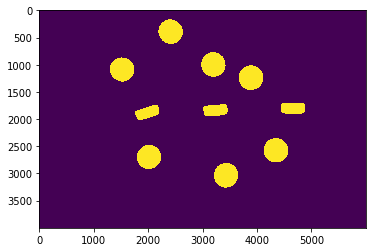

In [12]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)
plt.imshow(closed)

------------------
[3211 3258] [3211 2809] [3654 2809] [3654 3258]
[[-1.0000000e+00 -1.2246468e-16  6.0000000e+03]
 [ 1.2246468e-16 -1.0000000e+00  4.0000000e+03]]
[2788.9999999999995, 742.0] [2345.9999999999995, 1191.0] [3211 2809] [3654 3258]
(4000, 6000, 3)
742.0 1191.0 2345.9999999999995 2788.9999999999995
------------------
[1794 2915] [1794 2474] [2241 2474] [2241 2915]
[[-1.0000000e+00 -1.2246468e-16  6.0000000e+03]
 [ 1.2246468e-16 -1.0000000e+00  4.0000000e+03]]
[4206.0, 1084.9999999999995] [3758.9999999999995, 1526.0] [1794 2474] [2241 2915]
(4000, 6000, 3)
1084.9999999999995 1526.0 3758.9999999999995 4206.0
------------------
[4122 2795] [4122 2352] [4574 2352] [4574 2795]
[[-1.0000000e+00 -1.2246468e-16  6.0000000e+03]
 [ 1.2246468e-16 -1.0000000e+00  4.0000000e+03]]
[1878.0, 1205.0] [1426.0, 1648.0] [4122 2352] [4574 2795]
(4000, 6000, 3)
1205.0 1648.0 1426.0 1878.0
------------------
[1808 2046] [1748 1852] [2173 1721] [2233 1915]
[[-9.55352104e-01  2.95469723e-01  5.7316

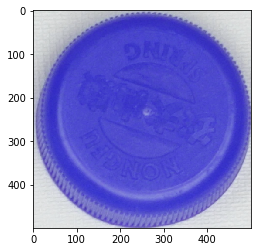

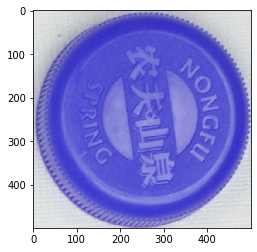

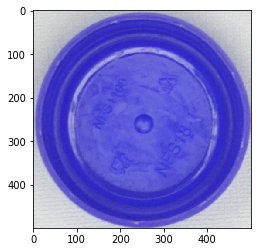

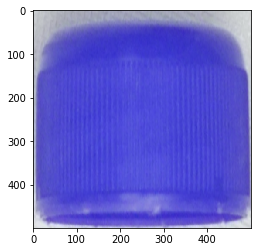

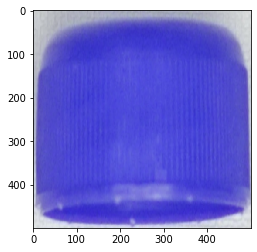

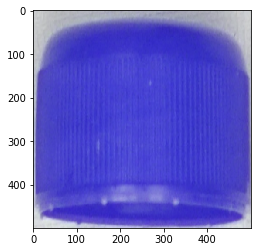

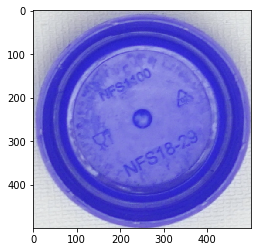

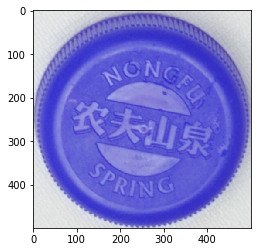

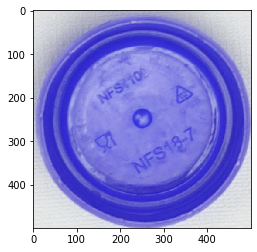

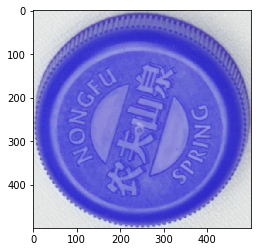

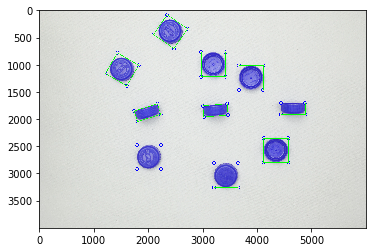

In [13]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
ct = 0
ls = []
res = np.copy(origin)
for c in cnts:
    if len(c) <= 200:
        continue
#     print(c)
    ct = ct + 1
    ls.append(len(c))
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    print("------------------")
    #print(-degrees(atan2(box[1][1]-box[0][1],box[1][0]-box[0][0])))
    imgOut = rotateImage(origin, -degrees(atan2(box[1][0]-box[0][0],box[1][1]-box[0][1])), box[0], box[1], box[2], box[3])
    
    now = datetime.datetime.now()
    global zxynb
    filename = str(now.strftime("%d-%H-%M-%S"))
    num_of_pages = str(zxynb)
    filename = './'+filename + '_'+ num_of_pages +'.jpg'
#     cv2.imwrite(filename, imgOut)
    zxynb = zxynb+1
    plt.imshow(imgOut)
    plt.figure()
#   cv2.imshow("imgOut", imgOut)  # 裁减得到的旋转矩形框
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()
#     label = input("input:")  
#     dataframe = pd.DataFrame({'filename':[filename],'label':[label]})
#     dataframe.to_csv('label.csv', mode='a', index=False, header=False)   
    
    
    point_color = (0, 0, 255)
    for i in box:
        res = cv2.circle(res,(i[0],i[1]),30,point_color,8)
    # draw a bounding box arounded the detected barcode and display the image
    res = cv2.drawContours(res, [box], -1, (0, 255, 0), 10)
plt.imshow(res)
print(ct)
print(ls)

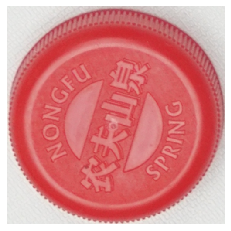

In [14]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


image = cv2.cvtColor(imgOut, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [15]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 2)
clt.fit(image)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

In [17]:
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

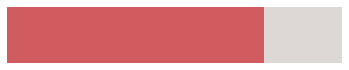

In [18]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [19]:
print(hist)

[0.769888 0.230112]


In [20]:
def detect_color(images):

    colorlist = []
    for img in images:
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        clt = KMeans(n_clusters = 2)
        clt.fit(image)
        hist = centroid_histogram(clt)
        if hist[0] > hist[1] :
            prominant_color = clt.cluster_centers_[0]
        else :
            prominant_color = clt.cluster_centers_[1]
        colorlist.append(prominant_color.astype("uint8"))
    return colorlist

In [21]:
colorlist= detect_color([imgOut])

In [22]:
print(colorlist)

[array([209,  92,  95], dtype=uint8)]


In [27]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [28]:
get_colour_name((209,  92,  95))

(None, 'indianred')